<a href="https://colab.research.google.com/github/gangakailas/Image_and_Video_Processing-Lab/blob/main/Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


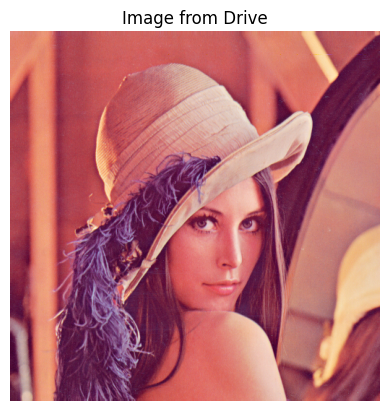

In [ ]:
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/lena.png'

# Open and display the image
img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')
plt.title("Image from Drive")
plt.show()


In [ ]:
# Print image format, size, and mode
print("Image Format:", img.format)
print("Image Size (Width x Height):", img.size)
print("Image Mode (Color format):", img.mode)


Image Format: PNG
Image Size (Width x Height): (512, 512)
Image Mode (Color format): RGB


In [ ]:
import os

# Save the image as a compressed copy (e.g., JPEG)
compressed_path = '/content/compressed_image.jpg'
img.save(compressed_path, format='JPEG', quality=85)  # quality 0-100

# Get file sizes in bytes
original_size = os.path.getsize(image_path)
compressed_size = os.path.getsize(compressed_path)

# Compute compression ratio
compression_ratio = original_size / compressed_size

# Print results
print(f"Original Size: {original_size / 1024:.2f} KB")
print(f"Compressed Size: {compressed_size / 1024:.2f} KB")
print(f"Compression Ratio: {compression_ratio:.2f}")


Original Size: 462.73 KB
Compressed Size: 51.63 KB
Compression Ratio: 8.96


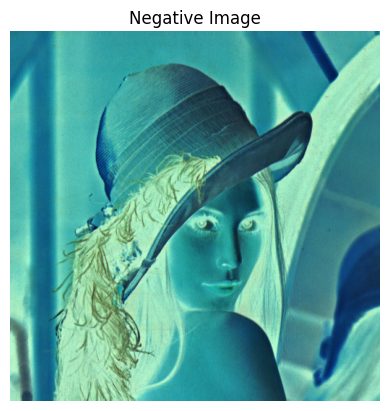

In [ ]:
from PIL import ImageOps
import matplotlib.pyplot as plt

# Convert image to RGB if not already (required for inversion)
img_rgb = img.convert("RGB")

# Get the negative
negative_img = ImageOps.invert(img_rgb)

# Display the negative image
plt.imshow(negative_img)
plt.axis('off')
plt.title("Negative Image")
plt.show()

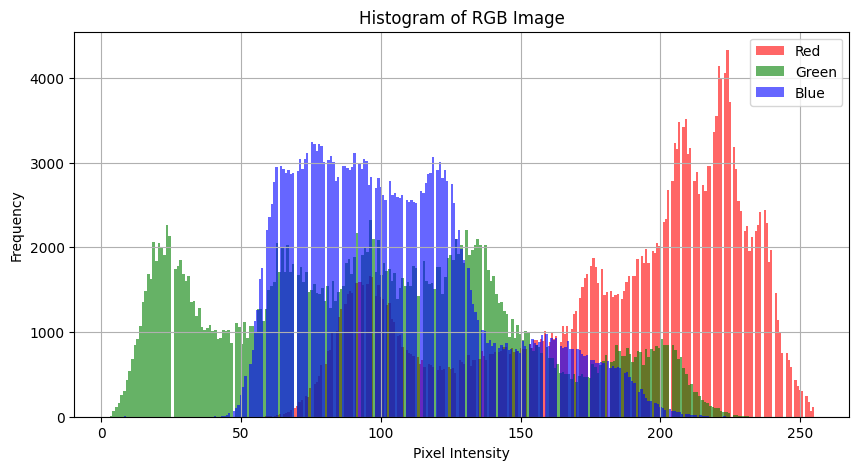

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert image to RGB if not already
img_rgb = img.convert("RGB")

# Convert to NumPy array
img_array = np.array(img_rgb)

# Plot histogram for each color channel
colors = ['red', 'green', 'blue']
channel_names = ['Red', 'Green', 'Blue']

plt.figure(figsize=(10, 5))
for i, color in enumerate(colors):
    plt.hist(img_array[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=channel_names[i])

plt.title("Histogram of RGB Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


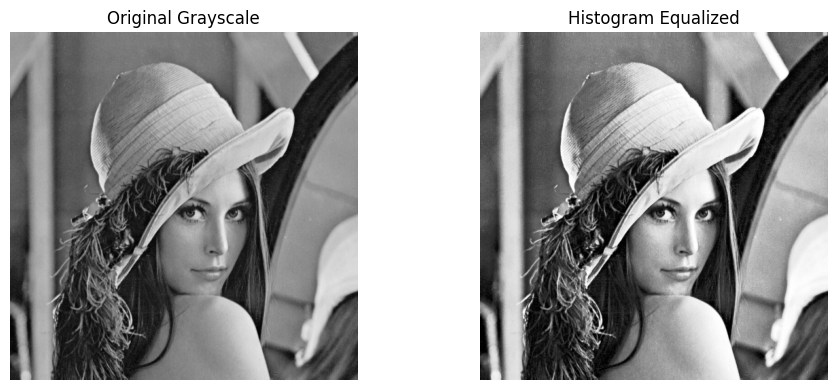

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Convert to grayscale
gray_img = img.convert("L")  # 'L' mode = grayscale
gray_np = np.array(gray_img)

# Apply histogram equalization
equalized_np = cv2.equalizeHist(gray_np)

# Convert back to PIL for display
equalized_img = Image.fromarray(equalized_np)

# Display original and equalized images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_np, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_np, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')

plt.tight_layout()
plt.show()


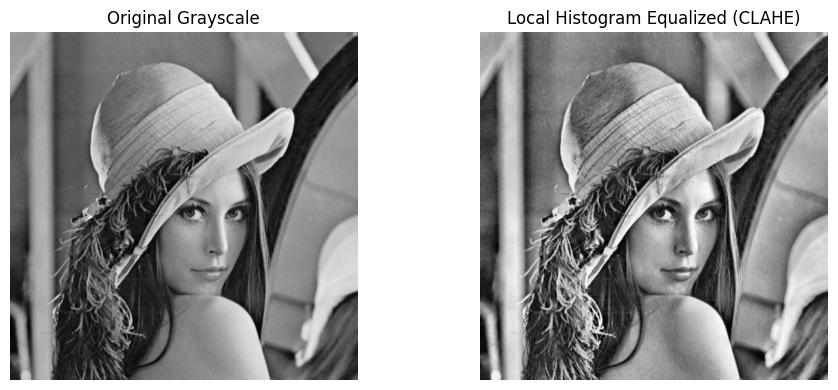

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Convert image to grayscale
gray_img = img.convert("L")
gray_np = np.array(gray_img)

# Create CLAHE object (you can tune clipLimit and tileGridSize)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE
clahe_img_np = clahe.apply(gray_np)

# Convert back to PIL Image for display
clahe_img = Image.fromarray(clahe_img_np)

# Display original and CLAHE images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_np, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img_np, cmap='gray')
plt.title("Local Histogram Equalized (CLAHE)")
plt.axis('off')

plt.tight_layout()
plt.show()


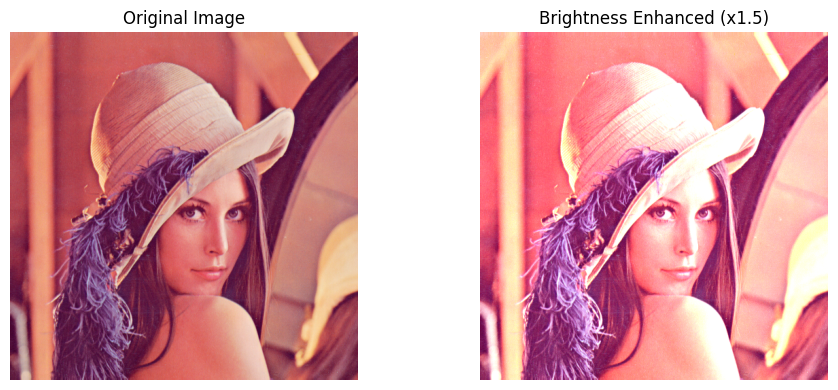

In [ ]:
from PIL import ImageEnhance
import matplotlib.pyplot as plt

# Create a Brightness enhancer
enhancer = ImageEnhance.Brightness(img)

# Increase brightness (e.g., factor = 1.5 means 50% brighter)
bright_img = enhancer.enhance(1.5)

# Display original and brightened images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bright_img)
plt.title("Brightness Enhanced (x1.5)")
plt.axis('off')

plt.tight_layout()
plt.show()


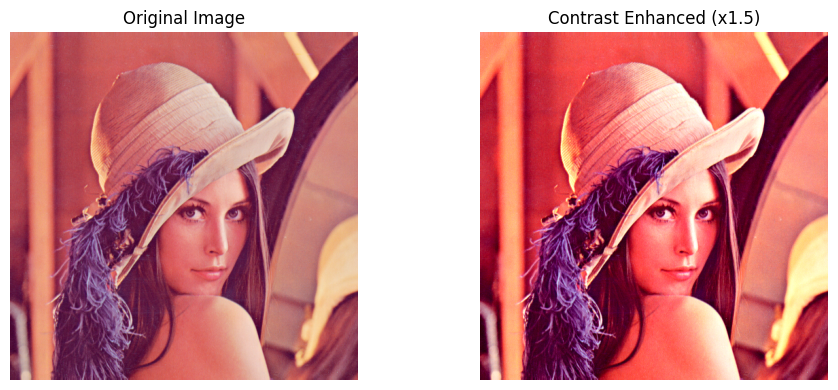

In [ ]:
from PIL import ImageEnhance
import matplotlib.pyplot as plt

# Create a Contrast enhancer
contrast_enhancer = ImageEnhance.Contrast(img)

# Enhance contrast (e.g., factor = 1.5 means 50% more contrast)
contrast_img = contrast_enhancer.enhance(1.5)

# Display original and contrast-enhanced images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contrast_img)
plt.title("Contrast Enhanced (x1.5)")
plt.axis('off')

plt.tight_layout()
plt.show()


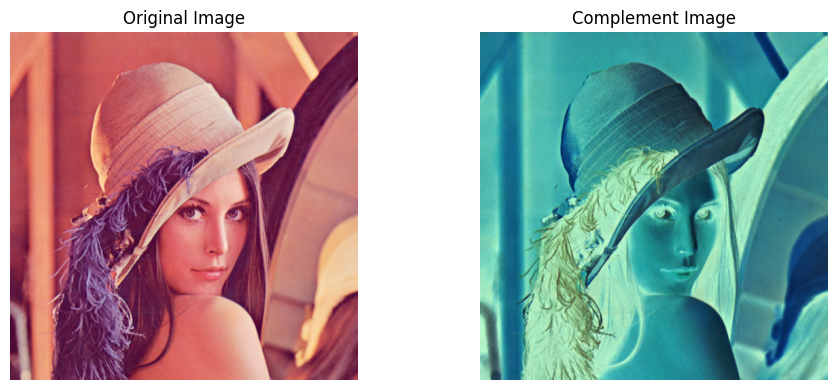

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ensure the image is in RGB mode
img_rgb = img.convert("RGB")

# Convert to NumPy array
img_np = np.array(img_rgb)

# Compute complement (invert pixel values)
complement_np = 255 - img_np

# Convert back to PIL image
complement_img = Image.fromarray(complement_np)

# Display original and complement images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(complement_img)
plt.title("Complement Image")
plt.axis('off')

plt.tight_layout()
plt.show()


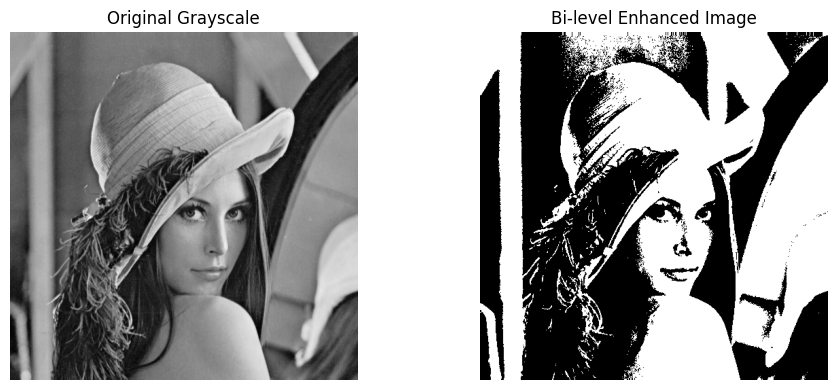

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Convert image to grayscale
gray_img = img.convert("L")
gray_np = np.array(gray_img)

# Set a threshold (can adjust this value, e.g., 128)
threshold = 128

# Apply binary thresholding
binary_np = np.where(gray_np >= threshold, 255, 0).astype(np.uint8)

# Convert back to PIL image
binary_img = Image.fromarray(binary_np)

# Display original and binary images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_img, cmap='gray')
plt.title("Bi-level Enhanced Image")
plt.axis('off')

plt.tight_layout()
plt.show()


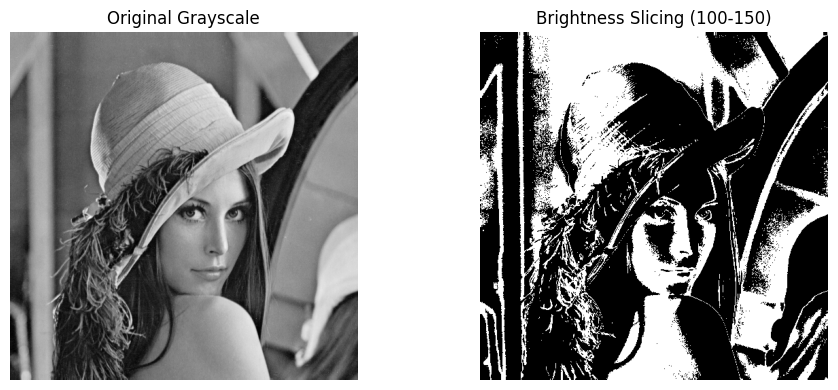

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Convert image to grayscale
gray_img = img.convert("L")
gray_np = np.array(gray_img)

# Define brightness range to highlight (e.g., between 100 and 150)
lower = 100
upper = 150

# Create a sliced image: highlight pixels in range, set others to 0
sliced_np = np.where((gray_np >= lower) & (gray_np <= upper), 255, 0).astype(np.uint8)

# Convert to PIL image
sliced_img = Image.fromarray(sliced_np)

# Display original and brightness-sliced images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sliced_img, cmap='gray')
plt.title(f"Brightness Slicing ({lower}-{upper})")
plt.axis('off')

plt.tight_layout()
plt.show()

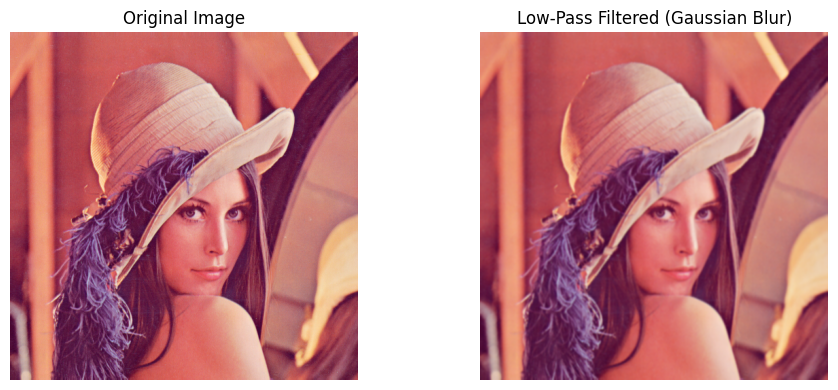

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Convert to RGB and then to NumPy array
img_rgb = img.convert("RGB")
img_np = np.array(img_rgb)

# Apply Gaussian blur (kernel size must be odd, e.g., 5x5)
blurred_np = cv2.GaussianBlur(img_np, (5, 5), sigmaX=0)

# Convert back to PIL image
blurred_img = Image.fromarray(blurred_np)

# Display original and blurred images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_np)
plt.title("Low-Pass Filtered (Gaussian Blur)")
plt.axis('off')

plt.tight_layout()
plt.show()


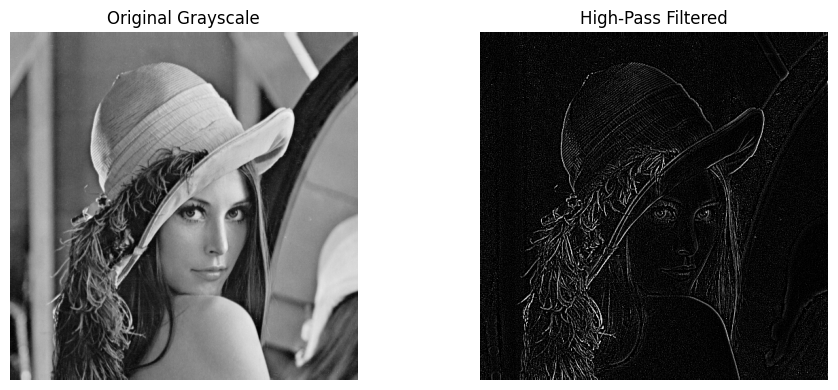

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Convert to grayscale for edge detail
gray_img = img.convert("L")
gray_np = np.array(gray_img)

# Define a high-pass filter kernel (3x3 Laplacian-like)
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Apply high-pass filter
highpass_np = cv2.filter2D(gray_np, -1, kernel)

# Clip to valid range and convert to uint8
highpass_np = np.clip(highpass_np, 0, 255).astype(np.uint8)

# Convert back to PIL for display
highpass_img = Image.fromarray(highpass_np)

# Display original and high-pass filtered image
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_np, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(highpass_np, cmap='gray')
plt.title("High-Pass Filtered")
plt.axis('off')

plt.tight_layout()
plt.show()


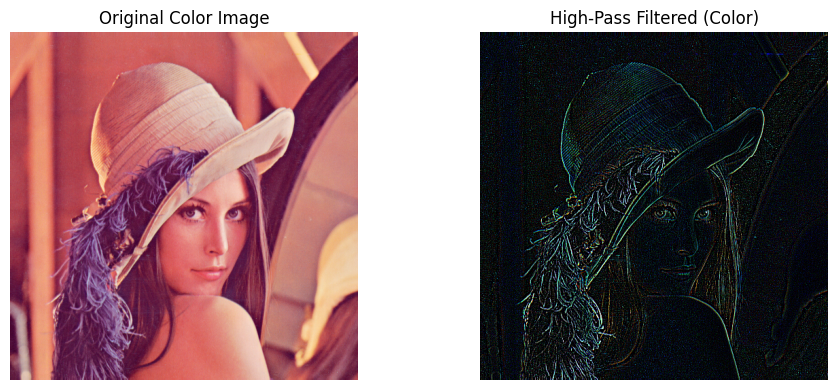

In [ ]:
# Convert to RGB and NumPy array
img_rgb = img.convert("RGB")
img_np = np.array(img_rgb)

# Define the same high-pass kernel
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Apply high-pass filter to each color channel
highpass_color = np.zeros_like(img_np)
for i in range(3):  # for R, G, B
    highpass_color[:, :, i] = cv2.filter2D(img_np[:, :, i], -1, kernel)

# Clip and convert to image
highpass_color = np.clip(highpass_color, 0, 255).astype(np.uint8)
highpass_img_color = Image.fromarray(highpass_color)

# Display
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original Color Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(highpass_color)
plt.title("High-Pass Filtered (Color)")
plt.axis('off')

plt.tight_layout()
plt.show()


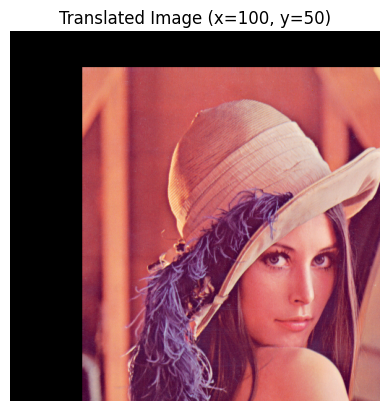

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Convert PIL image to NumPy array
img_np = np.array(img)

# Define translation values (e.g., move right by 100px and down by 50px)
tx = 100  # translation in x-direction
ty = 50   # translation in y-direction

# Create translation matrix
translation_matrix = np.float32([[1, 0, tx],
                                 [0, 1, ty]])

# Perform the translation
translated_img_np = cv2.warpAffine(img_np, translation_matrix, (img_np.shape[1], img_np.shape[0]))

# Display the translated image
plt.imshow(translated_img_np)
plt.axis('off')
plt.title(f'Translated Image (x={tx}, y={ty})')
plt.show()


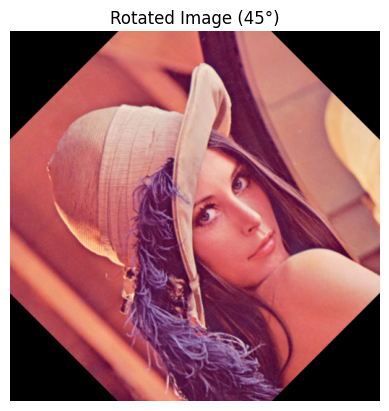

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert PIL image to NumPy array (if not already)
img_np = np.array(img)

# Get image dimensions
(h, w) = img_np.shape[:2]

# Define rotation angle (e.g., 45 degrees)
angle = 45

# Compute center of the image
center = (w // 2, h // 2)

# Get rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)

# Perform the rotation
rotated_img_np = cv2.warpAffine(img_np, rotation_matrix, (w, h))

# Display the rotated image
plt.imshow(rotated_img_np)
plt.axis('off')
plt.title(f'Rotated Image ({angle}°)')
plt.show()


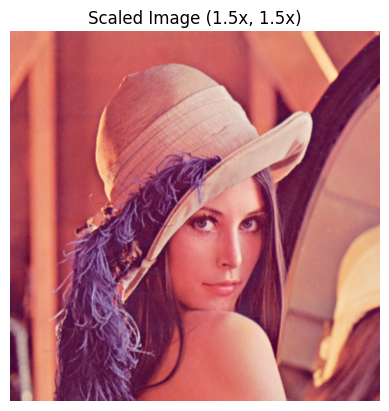

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert PIL image to NumPy array (if not already)
img_np = np.array(img)

# Define scaling factors
scale_x = 1.5  # Scale along width
scale_y = 1.5  # Scale along height

# Perform scaling
scaled_img_np = cv2.resize(img_np, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

# Display the scaled image
plt.imshow(scaled_img_np)
plt.axis('off')
plt.title(f'Scaled Image ({scale_x}x, {scale_y}x)')
plt.show()


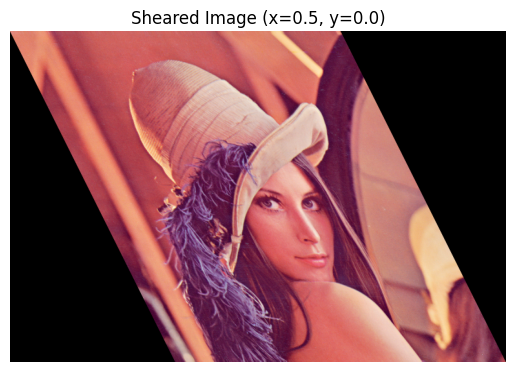

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert PIL image to NumPy array
img_np = np.array(img)
(h, w) = img_np.shape[:2]

# Define shear factors
shear_x = 0.5  # horizontal shear
shear_y = 0.0  # vertical shear

# Affine transformation matrix for skewing
shear_matrix = np.float32([
    [1, shear_x, 0],
    [shear_y, 1, 0]
])

# Calculate new width and height to accommodate skew
new_w = int(w + abs(shear_x) * h)
new_h = int(h + abs(shear_y) * w)

# Apply the affine transformation
skewed_img_np = cv2.warpAffine(img_np, shear_matrix, (new_w, new_h))

# Display skewed image
plt.imshow(skewed_img_np)
plt.axis('off')
plt.title(f'Sheared Image (x={shear_x}, y={shear_y})')
plt.show()
